In [1]:
#Imports
import sys
sys.path.append('../../python/')
import NGC5533_functions as nf

import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt
import lmfit as lm
import dataPython as dp

from datetime import datetime
import time as t

In [2]:
starttime = t.time()

#data = dp.getXYdata_wXYerr('data/NGC5533-rot-data_fmt.txt')
data = dp.getXYdata_wXYerr('../data/100kpc_data.txt')
r_dat = np.asarray(data['xx'])
v_dat = np.asarray(data['yy'])
v_err0 = np.asarray(data['ex'])
v_err1 = np.asarray(data['ey'])

#change r_dat so it's strictly increasing
r_dat, v_dat, v_err0, v_err1 = (np.asarray(list(a)) for a in zip(*sorted(zip(r_dat, v_dat, v_err0, v_err1))))
#converting v_err1 to an array
v_err1_array = np.asarray(v_err1)
#Express as weights
weighdata = 1/v_err1

In [3]:
# Function for fitting all parameters (n, re, h)
#def f(r,M,rc,rho00,c,n,re,h,pref):
#    return np.sqrt(nf.bh_v(r,M)**2 
#                   + nf.h_v(r,rc,rho00,load=True)**2 
#                   + c**2*nf.b_v(r,n,reload=True)**2 
#                   + nf.d_v(r,h,pref,load=True)**2)

# Function for fitting only prefactors + halo's parameters
def g(r,M,rc,rho00,c,pref):
    return np.sqrt(nf.bh_v(r,M)**2 
                   + nf.h_v(r,rc,rho00,load=True)**2 
                   + c*nf.b_v(r,load=True)**2 
                   + nf.d_v(r,pref,load=True)**2)

In [4]:
# Fit, using all parameters

#Setup
#l_mod = lm.Model(f)
#l_params = l_mod.make_params()
#Black Hole
#l_params.add('M', value=nf.Mbh_def, min=0) #Mass
#Bulge
#l_params.add('c', value=1, min=0)          #Contributions should all add
#l_params.add('n', value=nf.n_c, min=0)
#l_params.add('re', value=nf.re_c, min=0)
#Disk
#l_params.add('pref', value=nf.pref_def, min=0, max=1000)
#l_params.add('h', value=nf.h_c, min=0, max=1000)
#Halo
#l_params.add('rc', value=nf.h_rc, min=0)   #Radius (magnitude)
#l_params.add('rho00', value=nf.hrho00_c, min=0) #Density (halo)

#Do fit
#l_fit = l_mod.fit(v_dat,l_params,r=r_dat,weights=weighdata)

In [5]:
# Fit, using prefactors

#Setup
g_mod = lm.Model(g)
g_params = g_mod.make_params()
#Black Hole
g_params.add('M', value=nf.Mbh_def, min=0) #Mass
#Bulge
g_params.add('c', value=1, min=0)          #Contributions should all add
#Disk
g_params.add('pref', value=1, min=0, max=1000)
#Halo
g_params.add('rc', value=nf.h_rc, min=0)   #Radius (magnitude)
g_params.add('rho00', value=nf.hrho00_c, min=0) #Density (halo)

#Do fit
g_fit = g_mod.fit(v_dat,g_params,r=r_dat,weights=weighdata)

../../python\NGC5533_functions.py:308: RuntimeWarning: overflow encountered in cosh
  return d_durho0(r, h, d_rho00)*np.power(np.cosh(z/z0(h)), -2)
C:\Users\JB\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\integrate\quadpack.py:385: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  warnings.warn(msg, IntegrationWarning)


In [6]:
#Define curves to plot

##### Commenting l-curve out because it gave me an error: OverflowError: (34, 'Result too large')

#l_dict = l_fit.best_values
#l_M = l_dict['M']
#l_c = l_dict['c']
#l_n = l_dict['n']
#l_re = l_dict['re']
#l_h = l_dict['h']
#l_pref = l_dict['pref']
#l_rc = l_dict['rc']
#l_hrho00 = l_dict['rho00']

#l_curve = f(r_dat,l_M,l_c,l_n,l_re,l_h,l_pref,l_rc,l_hrho00)


g_dict = g_fit.best_values
g_M = g_dict['M']
g_c = g_dict['c']
g_pref = g_dict['pref']
g_rc = g_dict['rc']
g_hrho00 = g_dict['rho00']

g_curve = g(r_dat,g_M,g_c,g_pref,g_rc,g_hrho00)

../../python\NGC5533_functions.py:311: RuntimeWarning: invalid value encountered in double_scalars
  return 2*(ss.ellipk(d_px(r,u,xi)) - ss.ellipe(d_px(r,u,xi)))/(np.pi*np.sqrt(r*u*d_px(r,u,xi)))
C:\Users\JB\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\integrate\quadpack.py:385: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  warnings.warn(msg, IntegrationWarning)


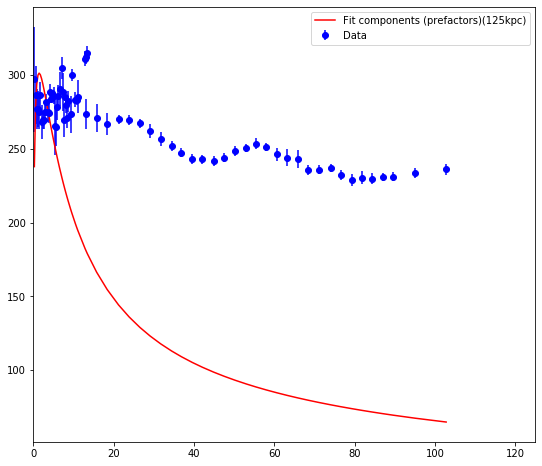

In [7]:
#Plot to 125kpc

fig = plt.figure(figsize=(9.0,8.0))

plt.xlim(0,125)

plt.errorbar(r_dat,v_dat,yerr=v_err1,fmt='bo',label='Data')
#plt.plot(r_dat,l_curve,'b-',label='Fit components (all) (125kpc)')
plt.plot(r_dat,g_curve,'r-',label='Fit components (prefactors)(125kpc)')

plt.legend()
plt.savefig('Fitting_allcomponents_125kpc.png')
plt.show()

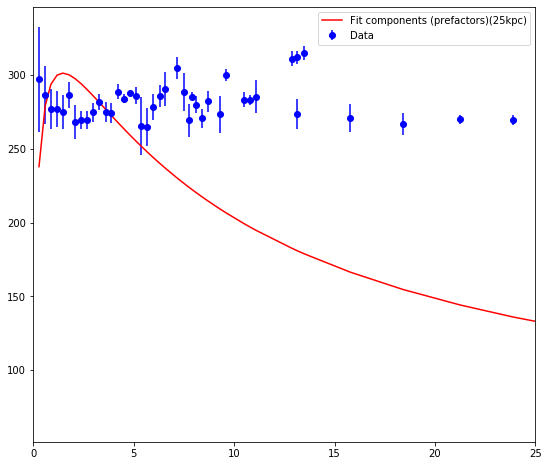

In [8]:
#Plot to 20kpc

fig = plt.figure(figsize=(9.0,8.0))

plt.xlim(0,25)

plt.errorbar(r_dat,v_dat,yerr=v_err1,fmt='bo',label='Data')
#plt.plot(r_dat,l_curve,'b-',label='Fit components (all) (25kpc)')
plt.plot(r_dat,g_curve,'r-',label='Fit components (prefactors)(25kpc)')

plt.legend()
plt.savefig('Fitting_allcomponents_25kpc.png')
plt.show()

In [9]:
#print('Fit information for all-component fit, no prefactor:')
#l_fit

In [10]:
print('Fit information for all-component fit, prefactor:')
g_fit

Fit information for all-component fit, prefactor:


In [11]:
# Using fitted parameters to calculate parameters for Galactic Components
    
# Bulge
print('Bulge')
print('Scaling constant,         C = {:.2f}'.format(l_c))

print('')


# Disk
print('Disk')
print('Scaling constant,         prefactor = {:.3f}'.format(l_pref))

print('')


# Black Hole
print('Black Hole')
print('Mass of the Black Hole,   M(bh) = {:.3e} [solar masses]'.format(l_M))
print('')


# Dark Halo
print('Dark Halo')
print('Halo central density,     rho00 = {:.3e} [solar mass/kpc^3]'.format(l_hrho00))
print('Core radius,              rc = {:.2f} [kpc]'.format(l_rc))


Bulge


NameError: name 'l_c' is not defined

In [ ]:
endtime = t.time()
print('Total Time:')
print(str(endtime - starttime)+' seconds')
print('')

print('Timestamp:')
print(datetime.now())